In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import tifffile as tf
import numpy as np
import os
from netCDF4 import Dataset
import rasterio
#import hydromt
#from hydromt_delwaq import DelwaqModel

import matplotlib.patches as mpatches
#import cartopy.crs as ccrs
import descartes # required to plot polygons
#import cartopy.io.img_tiles as cimgt
from matplotlib.colors import ListedColormap, BoundaryNorm

In [ ]:
"""
with rasterio.open('pop_dens.tif') as src:
    window= rasterio.windows.Window(400, 525, 150, 150)
    subset = src.read(window=window)
    transform = src.window_transform(window)
    meta = src.meta.copy()
    meta.update({
        'height': window.height,
        'width': window.width,
        'transform': transform
    })

 
# Write the subset to a new file   
with rasterio.open('pop_dens_zoom.tif', 'w', **meta) as dst:
    dst.write(subset)

"""

### read in maps & plot them

In [8]:
flood = tf.imread('../examples/Data bronnen/flooded_zoom.tif')
flooded[flooded < -3.402822e+38] = np.nan

print(np.nanmin(flooded))
print(np.nanmax(flooded))

-10.4919195
11.578357


C:\Users\weeber\AppData\Local\Temp\ipykernel_22056\4175759298.py:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable)


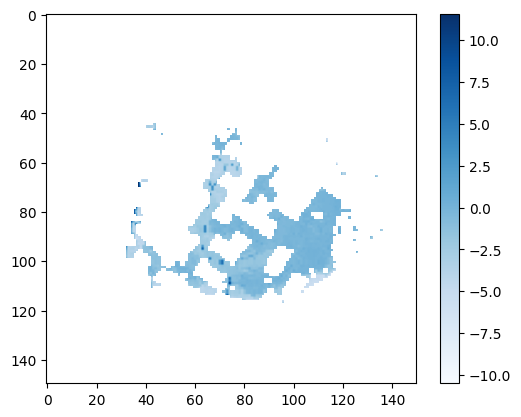

In [5]:
cmap = mpl.colormaps['Blues']
norm = plt.Normalize(vmin=np.nanmin(flooded), vmax=np.nanmax(flooded))
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots()

im = ax.imshow(flooded, cmap=cmap)
cbar = fig.colorbar(mappable)

plt.show()

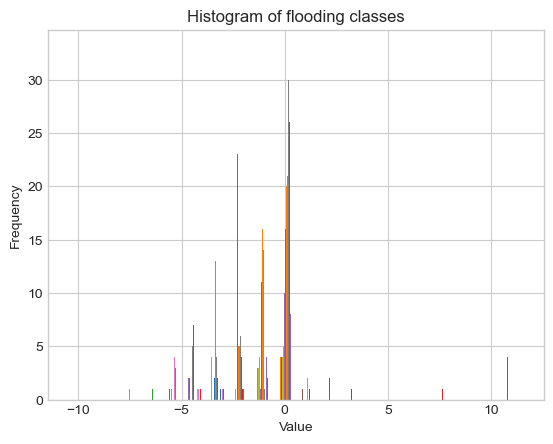

In [180]:
"""
hist, bins = np.histogram(flooded, bins=10, range=(np.nanmin(flooded), np.nanmax(flooded)))

# Plot the histogram
plt.hist(flooded, bins=20, range=(np.nanmin(flooded),np.nanmax(flooded)))
plt.title("Histogram of flooding classes")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()
"""

In [11]:
popdenst = tf.imread('../examples/Data bronnen/pop_dens_zoom.tif')
popd = popdenst.copy()
popd=popd*10 #creating -inf instead of floating veeeery small number 
popdens = popd.copy()
popdens[np.isinf(popdens)] = np.nan
popdens = popdens/10 #setting values back

print(np.nanmax(popdens))
print(np.nanmin(popdens))

141.86479
4.25104


C:\Users\weeber\AppData\Local\Temp\ipykernel_22056\3754079996.py:3: RuntimeWarning: overflow encountered in multiply
  popd=popd*10 #creating -inf instead of floating veeeery small number


C:\Users\weeber\AppData\Local\Temp\ipykernel_22056\4118336793.py:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable)


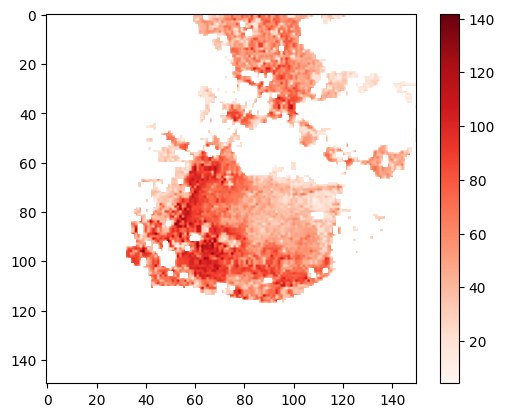

In [12]:
cmap = mpl.colormaps['Reds']
norm = plt.Normalize(vmin=np.nanmin(popdens), vmax=np.nanmax(popdens))
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots()

im = ax.imshow(popdens, cmap=cmap)
cbar = fig.colorbar(mappable)

plt.show()

### Visualize & calculate affected population

In [13]:
overl_flarea = np.where(flooded >= np.nanmin(flooded),popdens,np.nan)
overl_dryarea = np.where(np.isnan(flooded),popdens,np.nan)

C:\Users\weeber\AppData\Local\Temp\ipykernel_22056\3481121497.py:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable)


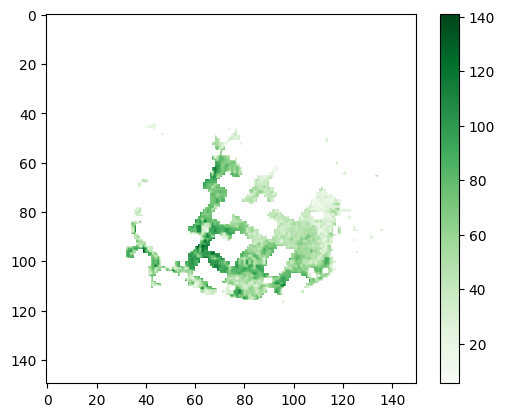

C:\Users\weeber\AppData\Local\Temp\ipykernel_22056\3481121497.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable)


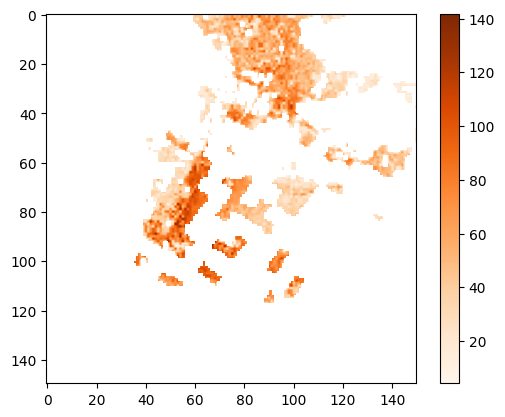

In [14]:
cmap = mpl.colormaps['Greens']
norm = plt.Normalize(vmin=np.nanmin(overl_flarea), vmax=np.nanmax(overl_flarea))
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots()

im = ax.imshow(overl_flarea, cmap=cmap)
cbar = fig.colorbar(mappable)

plt.show()

cmap = mpl.colormaps['Oranges']
norm = plt.Normalize(vmin=np.nanmin(overl_dryarea), vmax=np.nanmax(overl_dryarea))
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots()

im = ax.imshow(overl_dryarea, cmap=cmap)
cbar = fig.colorbar(mappable)

plt.show()

In [15]:
print('total inhabitants in total area:', round(np.nansum(popdens),0))
print('total inhabitants in flooded area:', round(np.nansum(overl_flarea),0), '(', round((np.nansum(overl_flarea)/np.nansum(popdens))*100,0),'%)')
print('total inhabitants in dry area:', round(np.nansum(overl_dryarea),0), '(', round((np.nansum(overl_dryarea)/np.nansum(popdens))*100,0),'%)')

total inhabitants in total area: 347166.0
total inhabitants in flooded area: 137904.0 ( 40.0 %)
total inhabitants in dry area: 209261.0 ( 60.0 %)


### Relate pathogen concentration to exposure levels
In this part, four flooding water depths are assumed: 0-0.10 (value 1), 0.1-0.5 (value 2),0.5-1.5 (value 3)and >1.5 (value 4). It is assumed that value 1 has no additional expore to not flooded, value 2 relates to wading of both children and adults, value 3 to swimming of children and wading by adults and value 4 both children and adults swim 


In [16]:
wclass = flooded.copy()
wclass[wclass>0]=np.nan
wclass[np.logical_and(wclass<0,wclass>=-0.1)]= 1
wclass[np.logical_and(wclass<-0.1,wclass>=-0.5)]=2
wclass[np.logical_and(wclass<-0.5,wclass>=-1.5)]=3
wclass[wclass<-1.5]= 4


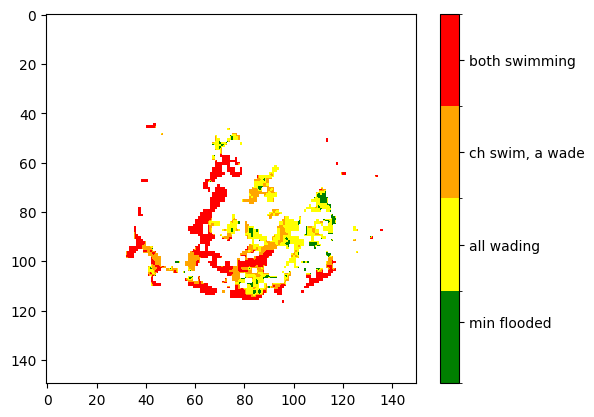

In [17]:
cmap = ListedColormap(['green', 'yellow', 'orange', 'red'])
bounds = [0, 1.5, 2.5, 3.5, 4.5]
norm = BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()

im = ax.imshow(wclass, cmap=cmap, norm=norm)
cbar = fig.colorbar(im, ticks=[1,2, 3,4], boundaries=bounds)
cbar.ax.set_yticklabels(['min flooded', 'all wading', 'ch swim, a wade', 'both swimming'])
plt.show()

In [18]:
np.nansum(wclass[wclass==1])

194.0

In [19]:
# make distinction between adults&children
# together with population data you know how many in each class, which can be highlighted in maps
print('total inhabitants in minimum flooded area:', round(np.nansum(wclass[wclass==1]),0),'(',round((np.nansum(wclass[wclass==1])/np.nansum(wclass))*100,0),'%)')
print('total inhabitants in area where everyone is wading:', round(np.nansum(wclass[wclass==2]),0),'(',round((np.nansum(wclass[wclass==2])/np.nansum(wclass))*100,0),'%)')
print('total inhabitants in area where children swim and adults wade:', round(np.nansum(wclass[wclass==3]),0),'(',round((np.nansum(wclass[wclass==3])/np.nansum(wclass))*100,0),'%)')
print('total inhabitants in area where everyone is swimming:', round(np.nansum(wclass[wclass==4]),0),'(',round((np.nansum(wclass[wclass==4])/np.nansum(wclass))*100,0),'%)')

# exposure data should be read in from text file
# read in dose response relations (via text file - link to different modules)

total inhabitants in minimum flooded area: 194.0 ( 3.0 %)
total inhabitants in area where everyone is wading: 1416.0 ( 21.0 %)
total inhabitants in area where children swim and adults wade: 1494.0 ( 22.0 %)
total inhabitants in area where everyone is swimming: 3648.0 ( 54.0 %)
